# Applying KNN Classifier Iris Dataset

# KNN Classifier

In [1]:
import numpy as np
float_formatter = "{:.6f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

from sklearn import datasets

iris_data = datasets.load_iris()

print("Feature names: \n", iris_data.feature_names)
print("Target names: \n", iris_data.target_names)

print("Feature data size: \n", iris_data.data.shape)
print("Target data size: \n", iris_data.target.shape)
print("Target values: \n", iris_data.target)

Feature names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: 
 ['setosa' 'versicolor' 'virginica']
Feature data size: 
 (150, 4)
Target data size: 
 (150,)
Target values: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [2]:
# Training and Testing the data
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=142)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Building a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Training the model with the train data
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [5]:
# Produce the features of a testing data instance
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

# Predicting the result label of X_new:
y_new_pred = clf_knn.predict(X_new)
print("The predicted class is: \n", y_new_pred)

X_new.shape: (1, 4)
The predicted class is: 
 [0]


### The model predicts that this new iris belongs to the class 0, meaning its species is setosa. 

# Evaluating the Model

In [7]:
# Checking the accuracy

from sklearn.metrics import accuracy_score
y_pred = clf_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is: %.4f\n" % accuracy)

Accuracy is: 0.8947



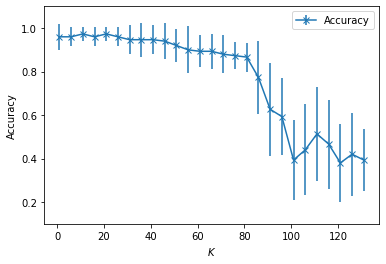

In [10]:
#Using Cross Validation to tune hyperperameters

from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

cv_scores = []
cv_scores_std = []
k_range = range(1, 135, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, iris_data.data, iris_data.target, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Ploting the misclassification error versus K

plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

It can be seen that the accuracy first goes up when $K$ increases. It peeks around 15. Then, it keeps going down. Particularly, the performance (measured by the score mean) and its robustness/stableness (measured by the score std) drop substantially around K=85. One possible reason is that when K is bigger than 85, the model suffers from the underfitting issue severely. 

In [11]:
# Checking if the selected hyperparameter (K) can lead to the highest misclassification accuracy

from sklearn.model_selection import GridSearchCV
parameter_grid = {'n_neighbors': range(1,135,5)}
knn_clf = KNeighborsClassifier()
gs_knn = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
gs_knn.fit(iris_data.data, iris_data.target)

print('Best K value', gs_knn.best_params_['n_neighbors'])
print('The accuracy: %.4f\n' %gs_knn.best_score_)

Best K value 11
The accuracy: 0.9800



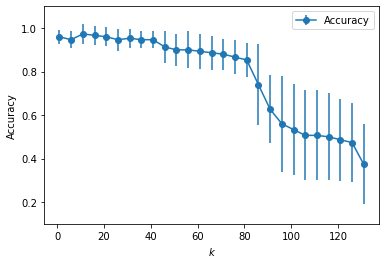

In [14]:
# Getting the statistics:
cv_scores_means = gs_knn.cv_results_['mean_test_score']
cv_scores_stds = gs_knn.cv_results_['std_test_score']

# Ploting the relationship
plt.errorbar(k_range, cv_scores_means, yerr=cv_scores_stds, marker='o', label='Accuracy')
plt.ylim([0.1,1.1])
plt.xlabel('$k$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()